In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, shapiro, levene, mannwhitneyu
from metrics import plot_roc_auc_curves, plot_precision_recall_curves

In [23]:
df = pd.read_csv(r"C:\Users\ruben\OneDrive\Desktop\Loan approvval\credit_risk_dataset.csv")
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [26]:
df = df.loc[df["person_income"]<200000]

## Check distribution of the target variable

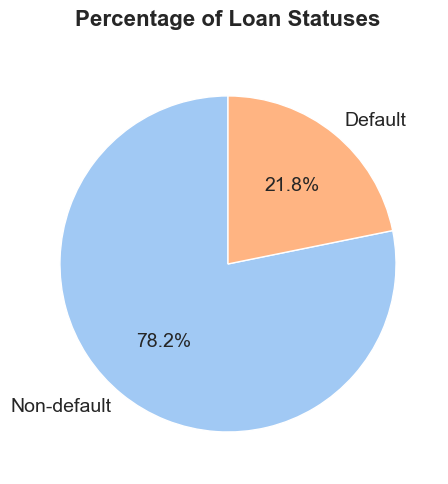

In [ ]:
sns.set(style="whitegrid", palette="pastel")

loan_status_counts = df['loan_status'].value_counts()

labels = ['Non-default', 'Default']
colors = sns.color_palette("pastel")[:len(labels)]

plt.figure(figsize=(5, 5))
plt.pie(
    loan_status_counts,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    textprops={'fontsize': 14}
)

plt.title("Percentage of Loan Statuses", fontsize=16, fontweight="bold", pad=20)

plt.tight_layout()
plt.show()

## Person income

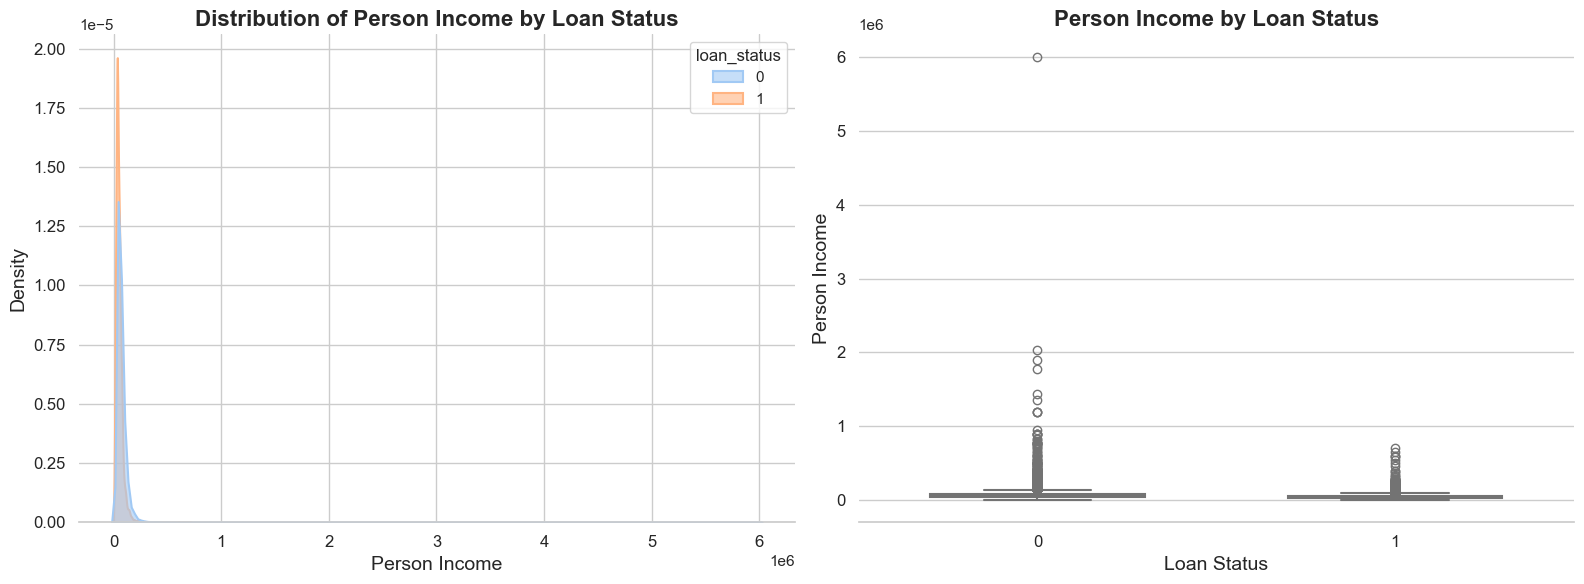

In [24]:
# Set the style
sns.set(style="whitegrid", palette="pastel")

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))  # 1 row, 2 columns

# KDE Plot
sns.kdeplot(
    data=df,
    x="person_income",
    hue="loan_status",
    fill=True,
    common_norm=False,  # Normalize each distribution independently
    alpha=0.6,  # Adjust transparency
    linewidth=1.5,  # Thicker lines for better visibility
    ax=axes[0]  # Place the KDE plot in the first subplot
)

# Customize the KDE plot
axes[0].set_title("Distribution of Person Income by Loan Status", fontsize=16, fontweight="bold")
axes[0].set_xlabel("Person Income", fontsize=14)
axes[0].set_ylabel("Density", fontsize=14)
axes[0].tick_params(axis='both', labelsize=12)

# Add a legend to the KDE plot
if not axes[0].legend_:
    axes[0].legend(title="Loan Status", title_fontsize=12, fontsize=12)

# Boxplot
sns.boxplot(
    x='loan_status',
    y='person_income',
    hue='loan_status',  # Assign x variable to hue
    data=df,
    palette="pastel",  # Use pastel colors
    linewidth=1.5,  # Thicker lines for better visibility
    width=0.6,  # Adjust the width of the boxes
    legend=False,  # Disable the legend (since hue is used for coloring)
    ax=axes[1]  # Place the boxplot in the second subplot
)

# Customize the boxplot
axes[1].set_title("Person Income by Loan Status", fontsize=16, fontweight="bold")
axes[1].set_xlabel("Loan Status", fontsize=14)
axes[1].set_ylabel("Person Income", fontsize=14)
axes[1].tick_params(axis='both', labelsize=12)

# Remove unnecessary spines
sns.despine(left=True)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [25]:
t_stat, p_value = ttest_ind(df[df['loan_status'] == 1]['person_income'], df[df['loan_status'] == 0]['person_income'], alternative='less')

print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: defaulters have a significantly lower income.")
else:
    print("Fail to reject the null hypothesis: no significant difference in income.")

T-statistic: -26.3490
P-value: 0.0000
Reject the null hypothesis: defaulters have a significantly lower income.


## Analyze interest rate

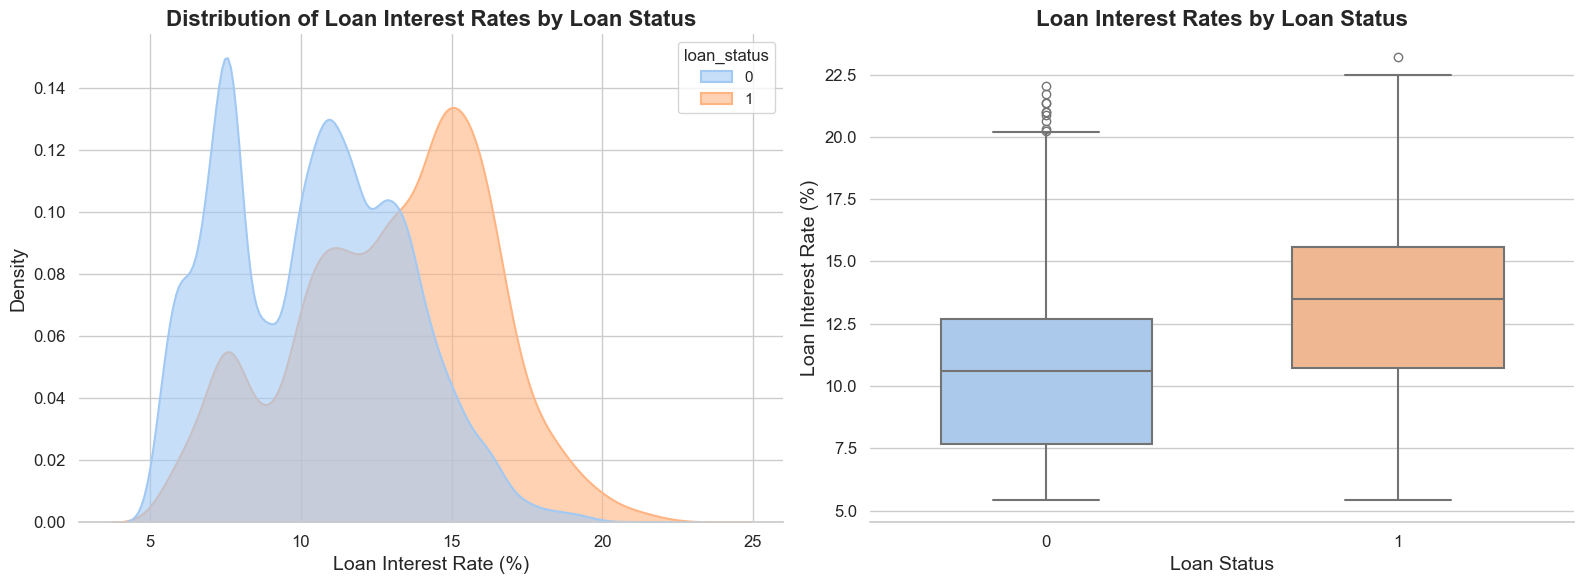

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style
sns.set(style="whitegrid", palette="pastel")

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))  # 1 row, 2 columns

# KDE Plot
sns.kdeplot(
    data=df,
    x="loan_int_rate",
    hue="loan_status",
    fill=True,
    common_norm=False,  # Normalize each distribution independently
    alpha=0.6,  # Adjust transparency
    linewidth=1.5,  # Thicker lines for better visibility
    ax=axes[0]  # Place the KDE plot in the first subplot
)

# Customize the KDE plot
axes[0].set_title("Distribution of Loan Interest Rates by Loan Status", fontsize=16, fontweight="bold")
axes[0].set_xlabel("Loan Interest Rate (%)", fontsize=14)
axes[0].set_ylabel("Density", fontsize=14)
axes[0].tick_params(axis='both', labelsize=12)

# Add a legend to the KDE plot
if not axes[0].legend_:
    axes[0].legend(title="Loan Status", title_fontsize=12, fontsize=12)

# Boxplot
sns.boxplot(
    x='loan_status',
    y='loan_int_rate',
    hue='loan_status',  # Assign x variable to hue
    data=df,
    palette="pastel",  # Use pastel colors
    linewidth=1.5,  # Thicker lines for better visibility
    width=0.6,  # Adjust the width of the boxes
    legend=False,  # Disable the legend (since hue is used for coloring)
    ax=axes[1]  # Place the boxplot in the second subplot
)

# Customize the boxplot
axes[1].set_title("Loan Interest Rates by Loan Status", fontsize=16, fontweight="bold")
axes[1].set_xlabel("Loan Status", fontsize=14)
axes[1].set_ylabel("Loan Interest Rate (%)", fontsize=14)
axes[1].tick_params(axis='both', labelsize=12)

# Remove unnecessary spines
sns.despine(left=True)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

## Analyze impact of loan percentage on income

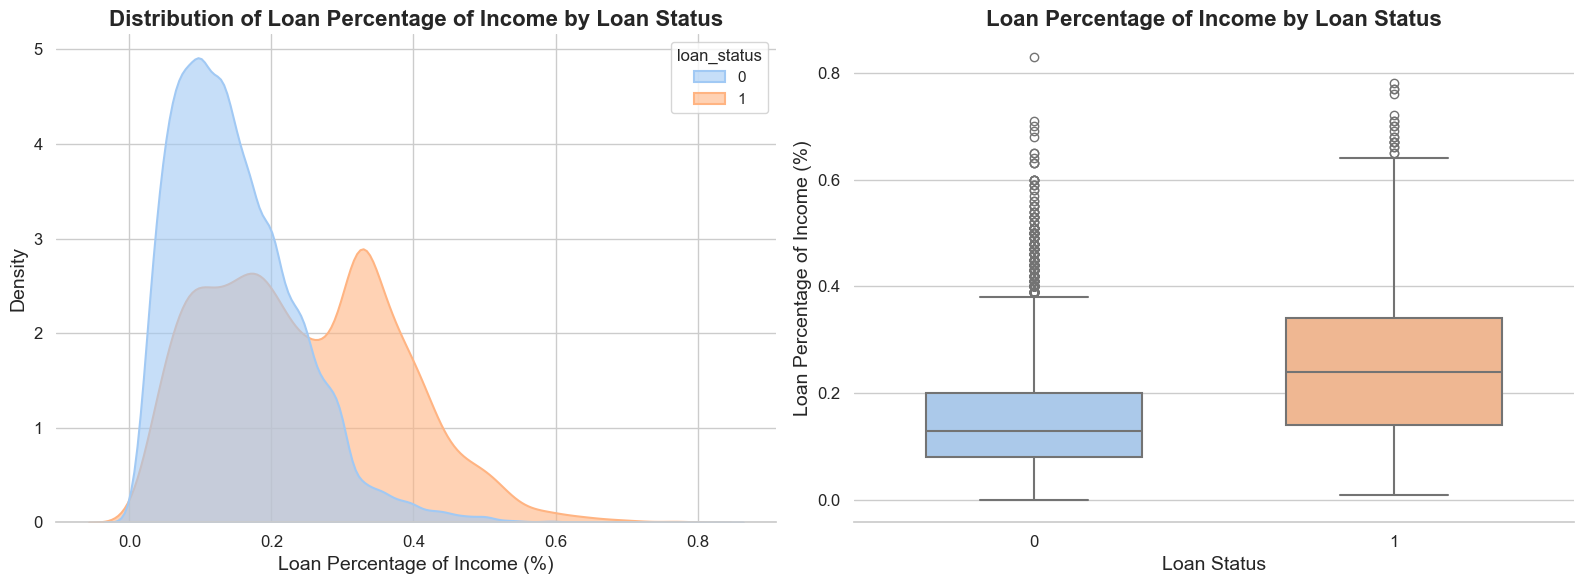

In [39]:
# Set the style
sns.set(style="whitegrid", palette="pastel")

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))  # 1 row, 2 columns

# KDE Plot
sns.kdeplot(
    data=df,
    x="loan_percent_income",
    hue="loan_status",
    fill=True,
    common_norm=False,  # Normalize each distribution independently
    alpha=0.6,  # Adjust transparency
    linewidth=1.5,  # Thicker lines for better visibility
    ax=axes[0]  # Place the KDE plot in the first subplot
)

# Customize the KDE plot
axes[0].set_title("Distribution of Loan Percentage of Income by Loan Status", fontsize=16, fontweight="bold")
axes[0].set_xlabel("Loan Percentage of Income (%)", fontsize=14)
axes[0].set_ylabel("Density", fontsize=14)
axes[0].tick_params(axis='both', labelsize=12)

# Add a legend to the KDE plot
if not axes[0].legend_:
    axes[0].legend(title="Loan Status", title_fontsize=12, fontsize=12)

# Boxplot
sns.boxplot(
    x='loan_status',
    y='loan_percent_income',
    hue='loan_status',  # Assign x variable to hue
    data=df,
    palette="pastel",  # Use pastel colors
    linewidth=1.5,  # Thicker lines for better visibility
    width=0.6,  # Adjust the width of the boxes
    legend=False,  # Disable the legend (since hue is used for coloring)
    ax=axes[1]  # Place the boxplot in the second subplot
)

# Customize the boxplot
axes[1].set_title("Loan Percentage of Income by Loan Status", fontsize=16, fontweight="bold")
axes[1].set_xlabel("Loan Status", fontsize=14)
axes[1].set_ylabel("Loan Percentage of Income (%)", fontsize=14)
axes[1].tick_params(axis='both', labelsize=12)

# Remove unnecessary spines
sns.despine(left=True)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

## Person home ownership

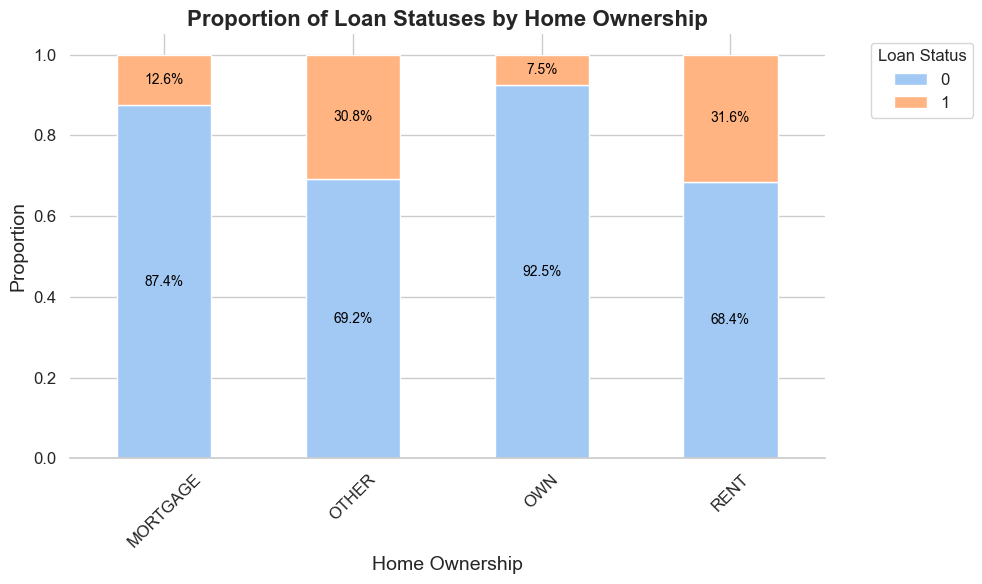

In [ ]:
# Set the style
sns.set(style="whitegrid", palette="pastel")

# Calculate proportions
proportions = df.groupby(['person_home_ownership', 'loan_status']).size().unstack().apply(lambda x: x / x.sum(), axis=1)

# Create the plot
ax = proportions.plot(kind='bar', stacked=True, figsize=(10, 6), color=sns.color_palette("pastel"))

# Customize the plot
plt.title("Proportion of Loan Statuses by Home Ownership", fontsize=16, fontweight="bold")
plt.xlabel("Home Ownership", fontsize=14)
plt.ylabel("Proportion", fontsize=14)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)

# Add a legend
plt.legend(title="Loan Status", title_fontsize=12, fontsize=12, bbox_to_anchor=(1.05, 1), loc='upper left')

# Remove unnecessary spines
sns.despine(left=True)

# Add percentage labels
for i, (index, row) in enumerate(proportions.iterrows()):
    cumulative_height = 0
    for j, value in enumerate(row):
        if value > 0:  # Only label bars with height > 0
            ax.text(
                i,  # x-position (bar index)
                cumulative_height + value / 2,  # y-position (middle of the segment)
                f"{value:.1%}",  # Percentage label
                ha='center',  # Horizontal alignment
                va='center',  # Vertical alignment
                fontsize=10,  # Font size
                color='black'  # Text color
            )
        cumulative_height += value  # Update cumulative height for the next segment

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

## Loan intent

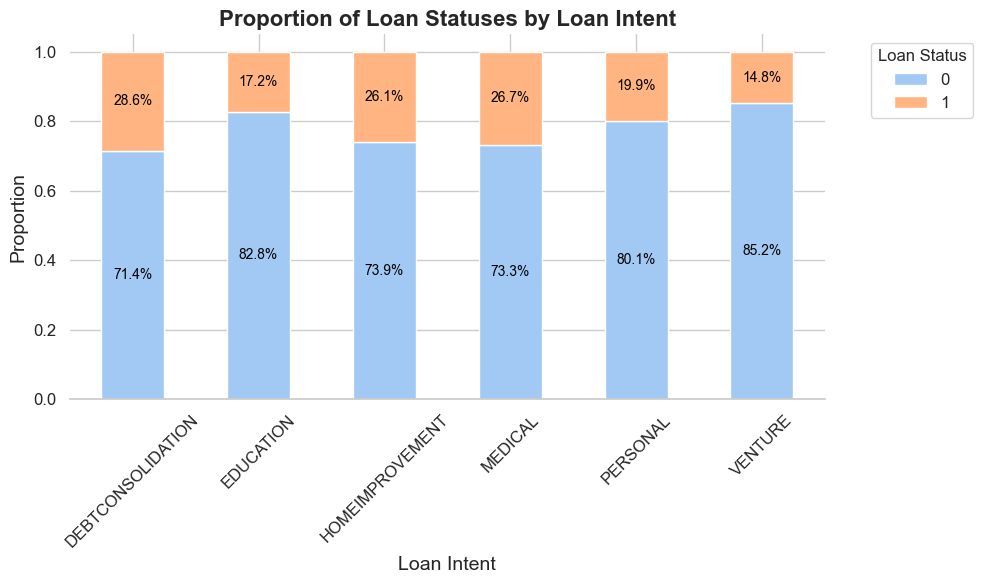

In [49]:
# Set the style
sns.set(style="whitegrid", palette="pastel")

# Calculate proportions
proportions = df.groupby(['loan_intent', 'loan_status']).size().unstack().apply(lambda x: x / x.sum(), axis=1)

# Create the plot
ax = proportions.plot(kind='bar', stacked=True, figsize=(10, 6), color=sns.color_palette("pastel"))

# Customize the plot
plt.title("Proportion of Loan Statuses by Loan Intent", fontsize=16, fontweight="bold")
plt.xlabel("Loan Intent", fontsize=14)
plt.ylabel("Proportion", fontsize=14)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)

# Add a legend
plt.legend(title="Loan Status", title_fontsize=12, fontsize=12, bbox_to_anchor=(1.05, 1), loc='upper left')

# Remove unnecessary spines
sns.despine(left=True)

# Add percentage labels
for i, (index, row) in enumerate(proportions.iterrows()):
    cumulative_height = 0
    for j, value in enumerate(row):
        if value > 0:  # Only label bars with height > 0
            ax.text(
                i,  # x-position (bar index)
                cumulative_height + value / 2,  # y-position (middle of the segment)
                f"{value:.1%}",  # Percentage label
                ha='center',  # Horizontal alignment
                va='center',  # Vertical alignment
                fontsize=10,  # Font size
                color='black'  # Text color
            )
        cumulative_height += value  # Update cumulative height for the next segment

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

## Loan grade

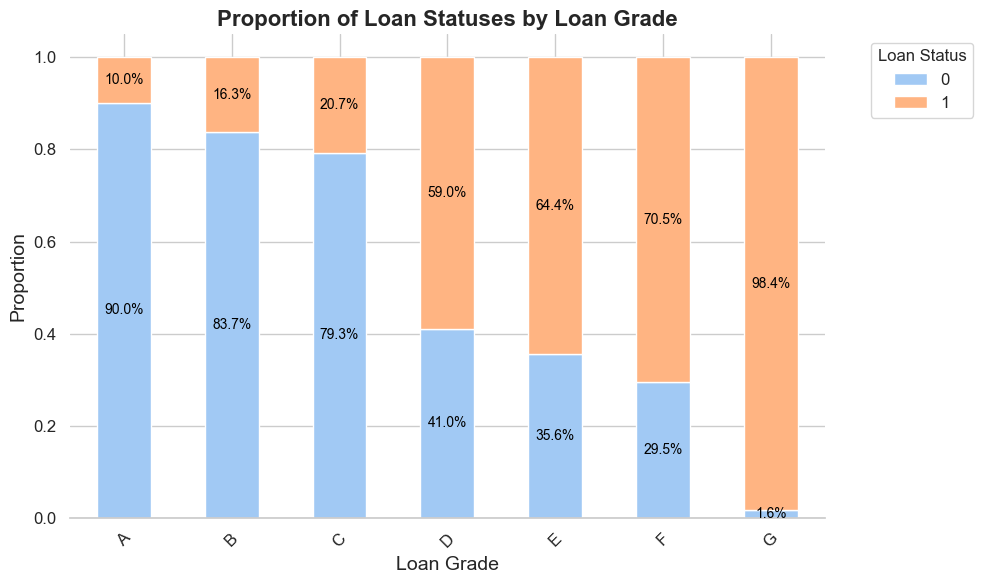

In [50]:
# Set the style
sns.set(style="whitegrid", palette="pastel")

# Calculate proportions
proportions = df.groupby(['loan_grade', 'loan_status']).size().unstack().apply(lambda x: x / x.sum(), axis=1)

# Create the plot
ax = proportions.plot(kind='bar', stacked=True, figsize=(10, 6), color=sns.color_palette("pastel"))

# Customize the plot
plt.title("Proportion of Loan Statuses by Loan Grade", fontsize=16, fontweight="bold")
plt.xlabel("Loan Grade", fontsize=14)
plt.ylabel("Proportion", fontsize=14)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)

# Add a legend
plt.legend(title="Loan Status", title_fontsize=12, fontsize=12, bbox_to_anchor=(1.05, 1), loc='upper left')

# Remove unnecessary spines
sns.despine(left=True)

# Add percentage labels
for i, (index, row) in enumerate(proportions.iterrows()):
    cumulative_height = 0
    for j, value in enumerate(row):
        if value > 0:  # Only label bars with height > 0
            ax.text(
                i,  # x-position (bar index)
                cumulative_height + value / 2,  # y-position (middle of the segment)
                f"{value:.1%}",  # Percentage label
                ha='center',  # Horizontal alignment
                va='center',  # Vertical alignment
                fontsize=10,  # Font size
                color='black'  # Text color
            )
        cumulative_height += value  # Update cumulative height for the next segment

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
def calculate_woe(col, df):
    crosstab_woe = pd.crosstab(df[col], df["loan_status"], normalize='columns')
    df[col + "_woe"] = df[col].map(np.log(crosstab_woe[0] / crosstab_woe[1]))

    return df

calculate_woe("person_home_ownership", df)
df[["person_home_ownership", "person_home_ownership_woe"]].drop_duplicates().sort_values(by="person_home_ownership_woe")

In [ ]:
crosstab_woe = pd.crosstab(df["person_home_ownership"], df["loan_status"])
crosstab_woe[0] / crosstab_woe[0].sum()

In [ ]:
df[["person_home_ownership", "person_home_ownership_woe"]].drop_duplicates().sort_values(by="person_home_ownership_woe")

In [ ]:
df.isna().sum()

In [ ]:
categorical_columns = df.select_dtypes(include="object").columns

for col in categorical_columns:
    contingency = pd.crosstab(df[col], df["loan_status"])
    woe = np.log((contingency[0] / contingency[0].sum()) / (contingency[1] / contingency[1].sum()))
    df[col + '_woe'] = df[col].map(woe)

df["cb_person_default_on_file"] = df["cb_person_default_on_file"].map({"Y": 1, "N": 0})
#df.drop(categorical_columns, axis=1, inplace=True)

In [ ]:
df[["person_home_ownership", "person_home_ownership_woe"]].drop_duplicates().sort_values(by="person_home_ownership_woe")

In [ ]:
df["person_emp_length"] = df["person_emp_length"].fillna(df["person_emp_length"].median())
df["loan_int_rate"] = df["loan_int_rate"].fillna(df["loan_int_rate"].median())

In [ ]:
df.loc[df["person_emp_length"] > 60, "person_emp_length"] = df["person_emp_length"].median()
df.loc[df["person_age"] > 90, "person_age"] = df["person_age"].median()

In [ ]:
sns.catplot(x="loan_intent", y="loan_int_rate", data=df)

In [ ]:
sns.heatmap(crosstab, annot=True, cmap="YlGnBu")

In [ ]:
sns.countplot(data=df, x="loan_status", hue="loan_grade")
plt.title("Count Plot of Loan Status by Loan Grade")
plt.xlabel("Loan Status")
plt.ylabel("Count")
plt.legend(title="Loan Grade")
plt.show()

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Create a crosstab of counts
crosstab = pd.crosstab(df["loan_status"], df["loan_grade"])

# Plot a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(crosstab, annot=True, fmt="d", cmap="Blues")
plt.title("Heatmap of Loan Status vs. Loan Grade")
plt.xlabel("Loan Grade")
plt.ylabel("Loan Status")
plt.show()

In [ ]:
sns.regplot(x="person_emp_length", y="loan_int_rate", data=df, line_kws={'color': 'red', 'linewidth': 2}, ci=None)

In [ ]:
df[df["loan_int_rate"].isna()]
sns.histplot(df["loan_int_rate"], kde=True, bins=50)

In [ ]:
sns.catplot(data=df, x="loan_status", y="loan_int_rate")

In [ ]:
df.groupby("loan_status")["loan_int_rate"].agg(['min', 'mean', 'median', 'max'])

In [ ]:
import pandas as pd
from scipy.stats import ttest_ind, levene, mannwhitneyu
import matplotlib.pyplot as plt
import scipy.stats as stats

# Drop NaN values
group_0 = df[df["loan_status"] == 0]["loan_int_rate"].dropna()
group_1 = df[df["loan_status"] == 1]["loan_int_rate"].dropna()

# Check equal variance
stat, p_value_var = levene(group_0, group_1)
print(f"Levene's test: statistic = {stat:.4f}, p-value = {p_value_var:.4f}")

# Perform t-test or Mann-Whitney U test
if p_value_var > 0.05:  # Equal variances
    t_stat, p_value = ttest_ind(group_0, group_1, equal_var=True)
else:  # Unequal variances (Welch's t-test)
    t_stat, p_value = ttest_ind(group_0, group_1, equal_var=False)

print(f"T-test: t-statistic = {t_stat:.4f}, p-value = {p_value:.4f}")

# Non-parametric test if necessary
if p_value < 0.05:  # If t-test shows significance
    u_stat, p_value_mwu = mannwhitneyu(group_0, group_1)
    print(f"Mann-Whitney U test: U-statistic = {u_stat:.4f}, p-value = {p_value_mwu:.4f}")

In [ ]:
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
df['fold'] = -1

for fold, (train_idx, val_idx) in enumerate(skf.split(X=df, y=df['loan_status'])):
    df.loc[val_idx, 'fold'] = fold

roc_auc_list = []
pr_auc_list = []
fpr_list = []
tpr_list = []
precision_list = []
recall_list = []

for fold in range(df["fold"].nunique()):
    train = df[df["fold"] != fold]
    test = df[df["fold"] == fold]

    X_train = train.drop(["loan_status", "fold"], axis=1)
    y_train = train["loan_status"]

    X_test = test.drop(["loan_status", "fold"], axis=1)
    y_test = test["loan_status"]

    xgb = XGBClassifier()
    xgb.fit(X_train, y_train)
    y_pred = xgb.predict(X_test)
    # df.loc[X_test.index, "xgb_pred"] = y_pred

    y_pred_proba = xgb.predict_proba(X_test)[:, 1]

    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
    pr_auc = average_precision_score(y_test, y_pred_proba)

    roc_auc_list.append(roc_auc)
    pr_auc_list.append(pr_auc)
    fpr_list.append(fpr)
    tpr_list.append(tpr)
    precision_list.append(precision)
    recall_list.append(recall)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)

    print(f"Fold {fold}: Accuracy = {accuracy:.4f}, Precision = {precision:.4f}, Recall = {recall:.4f}")

In [ ]:
df["xgb_pred"] = df["xgb_pred"].astype(int)
df["xgb_pred"].isna().sum()

In [ ]:
plot_precision_recall_curves(recall_list, precision_list, pr_auc_list)

In [ ]:
plot_roc_auc_curves(fpr_list, tpr_list, roc_auc_list)

In [ ]:
import shap

explainer = shap.TreeExplainer(xgb)
shap_values = explainer(X_test)

instance_idx = 20

shap.plots.waterfall(shap_values[instance_idx])

In [ ]:
df.loc[X_test.index[instance_idx], :].to_frame()

In [ ]:
probability = 1 / (1 + np.exp(-1.648))
print(probability)

In [ ]:
shap.plots.scatter(shap_values[:, "person_age"])